# 1. Pick any 10 risky assets from the market. Use their 3 months closing price to obtain simple returns.





In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
!wget https://raw.githubusercontent.com/qoo121314/Portfolio_Optimizer/master/PortfolioOptimizer.py

--2021-04-10 20:21:07--  https://raw.githubusercontent.com/qoo121314/Portfolio_Optimizer/master/PortfolioOptimizer.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21688 (21K) [text/plain]
Saving to: ‘PortfolioOptimizer.py’

PortfolioOptimizer. 100%[===================>]  21.18K  --.-KB/s    in 0s      

2021-04-10 20:21:07 (83.5 MB/s) - ‘PortfolioOptimizer.py’ saved [21688/21688]



In [2]:
tickers1 = ["ITC.NS", "GAIL.NS","RELIANCE.NS", "INFY.NS", "BPCL.NS"] # 
tickers2 =  ["WIPRO.NS", "TCS.NS", "HDFCBANK.NS", "KOTAKBANK.NS", "LT.NS"]


In [3]:
multpl_stocks_1 = web.get_data_yahoo(tickers1,
start = "2021-01-01",
end = "2021-03-31")
multpl_stocks_2 = web.get_data_yahoo(tickers2,
start = "2021-01-01",
end = "2021-03-31")

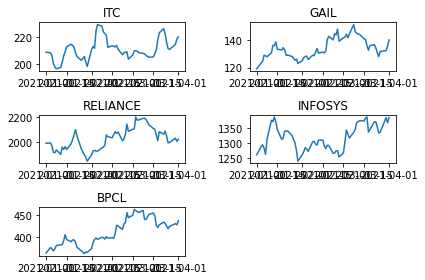

In [4]:
fig = plt.figure()

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)


ax1.plot(multpl_stocks_1['Adj Close']['ITC.NS'])
ax1.set_title("ITC")

ax2.plot(multpl_stocks_1['Adj Close']['GAIL.NS'])
ax2.set_title("GAIL")

ax3.plot(multpl_stocks_1['Adj Close']['RELIANCE.NS'])
ax3.set_title("RELIANCE")

ax4.plot(multpl_stocks_1['Adj Close']['INFY.NS'])
ax4.set_title("INFOSYS")

ax5.plot(multpl_stocks_1['Adj Close']['BPCL.NS'])
ax5.set_title("BPCL")

plt.tight_layout()
plt.show()

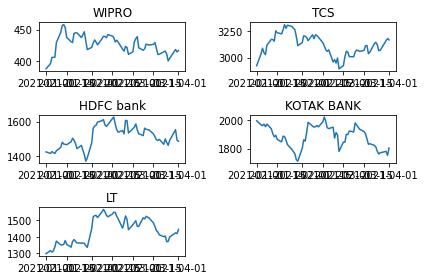

In [5]:
fig = plt.figure()
ax6 = fig.add_subplot(321)
ax7 = fig.add_subplot(322)
ax8 = fig.add_subplot(323)
ax9 = fig.add_subplot(324)
ax10 = fig.add_subplot(325)

ax6.plot(multpl_stocks_2['Adj Close']['WIPRO.NS'])
ax6.set_title("WIPRO")

ax7.plot(multpl_stocks_2['Adj Close']['TCS.NS'])
ax7.set_title("TCS")

ax8.plot(multpl_stocks_2['Adj Close']['HDFCBANK.NS'])
ax8.set_title("HDFC bank")

ax9.plot(multpl_stocks_2['Adj Close']['KOTAKBANK.NS'])
ax9.set_title("KOTAK BANK")

ax10.plot(multpl_stocks_2['Adj Close']['LT.NS'])
ax10.set_title("LT")

plt.tight_layout()
plt.show()

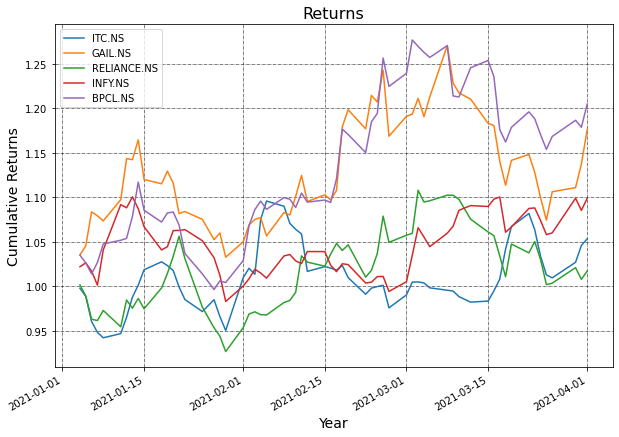

In [6]:
# Plot all the close prices
((multpl_stocks_1['Adj Close'].pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

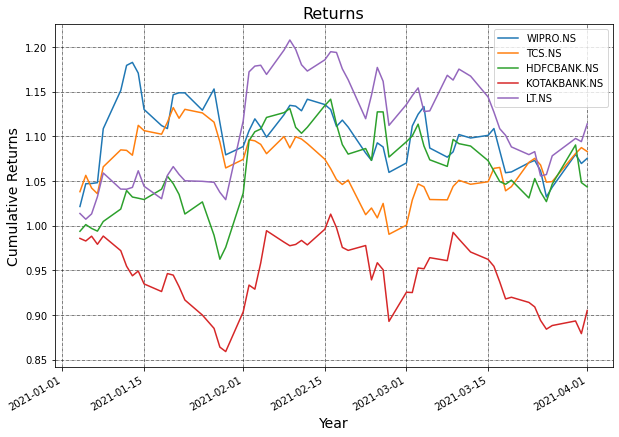

In [7]:
# Plot all the close prices
((multpl_stocks_2['Adj Close'].pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

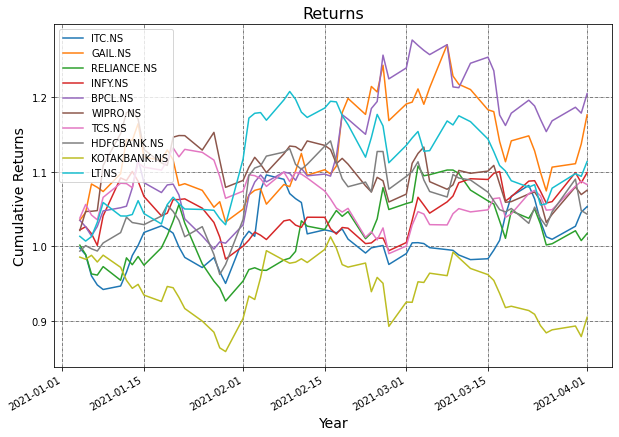

In [8]:
tickers = ["ITC.NS", "GAIL.NS","RELIANCE.NS", "INFY.NS", "BPCL.NS", "WIPRO.NS", "TCS.NS", "HDFCBANK.NS", "KOTAKBANK.NS", "LT.NS"]


multpl_stocks = web.get_data_yahoo(tickers,
start = "2021-01-01",
end = "2021-03-31")




# Plot all the close prices
((multpl_stocks['Adj Close'].pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

# 2. Use the mean-variance theory and build the Markowitz efficient frontier.


In [9]:

stocks = multpl_stocks['Adj Close']


In [10]:
stocks.head()

Symbols,ITC.NS,GAIL.NS,RELIANCE.NS,INFY.NS,BPCL.NS,WIPRO.NS,TCS.NS,HDFCBANK.NS,KOTAKBANK.NS,LT.NS
Date,,,,,,,,,,
2021-01-01,208.898636,119.134895,1987.500000,1260.449951,363.056396,387.229431,2922.688232,1425.050049,1994.050049,1297.000000
2021-01-04,208.459045,123.326057,1990.849976,1288.250000,375.793549,395.510803,3033.677002,1416.000000,1965.550049,1314.599976
2021-01-05,206.554199,124.578583,1966.099976,1293.800049,372.609253,405.388580,3087.125244,1426.699951,1959.750000,1306.300049
2021-01-06,200.644272,129.106964,1914.250000,1282.099976,368.141724,405.488373,3045.704102,1420.550049,1970.400024,1314.000000
2021-01-07,198.104477,128.577042,1911.150024,1262.150024,372.799377,405.837585,3027.039551,1416.250000,1952.400024,1338.949951


In [11]:
# Converting everything to logarithmic returns is simple. Think of it as the log of an arithmetic daily return (which is obtained by dividing the price at day n, by the price at day n-1).

In [12]:
log_returns = np.log(stocks/stocks.shift(1))
# log_returns.dropna(inplace=True)
log_returns.head()


Symbols,ITC.NS,GAIL.NS,RELIANCE.NS,INFY.NS,BPCL.NS,WIPRO.NS,TCS.NS,HDFCBANK.NS,KOTAKBANK.NS,LT.NS
Date,,,,,,,,,,
2021-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-04,-0.002107,0.034575,0.001684,0.021816,0.034482,0.021161,0.037272,-0.006371,-0.014396,0.013479
2021-01-05,-0.009180,0.010105,-0.012510,0.004299,-0.008510,0.024668,0.017465,0.007528,-0.002955,-0.006334
2021-01-06,-0.029029,0.035705,-0.026726,-0.009084,-0.012062,0.000246,-0.013508,-0.004320,0.005420,0.005877
2021-01-07,-0.012739,-0.004113,-0.001621,-0.015683,0.012572,0.000861,-0.006147,-0.003032,-0.009177,0.018810


In [13]:
# I’m going to use 6000 portfolios, but feel free to use less if your computer is too slow. The random seed at the top of the code is making sure I get the same random numbers every time for reproducibility.

In [14]:
np.random.seed(30)
num_ports = 6000
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(10))
    weights = weights/np.sum(weights) # Wi*
    
    # Save weights
    all_weights[x,:] = weights
    
    # Expected return
    ret_arr[x] = np.sum( (log_returns.mean() * weights * 252))
    
    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]

In [15]:
print("Max Sharpe")
print(sharpe_arr.max())
print("\n\n")
print("location in array")
print(sharpe_arr.argmax())

Max Sharpe
2.1829045591482688



location in array
5829


In [16]:
# Print the allocations in the max result
print(all_weights[5829,:])
max_returns = ret_arr[sharpe_arr.argmax()]
max_vol = vol_arr[sharpe_arr.argmax()]

[0.16018557 0.16545621 0.01349526 0.12533042 0.20906412 0.01196343
 0.0928393  0.10107981 0.00231196 0.11827392]


In [17]:
for i in range(10):
  print("The allocation for: "+str(tickers[i])+" is: "+ str(all_weights[5829,:][i]))

The allocation for: ITC.NS is: 0.16018557420080826
The allocation for: GAIL.NS is: 0.16545621356234136
The allocation for: RELIANCE.NS is: 0.01349525532525986
The allocation for: INFY.NS is: 0.12533041875814782
The allocation for: BPCL.NS is: 0.20906411879687964
The allocation for: WIPRO.NS is: 0.01196342922286724
The allocation for: TCS.NS is: 0.09283929590658799
The allocation for: HDFCBANK.NS is: 0.10107981312449213
The allocation for: KOTAKBANK.NS is: 0.002311956828650832
The allocation for: LT.NS is: 0.11827392427396483


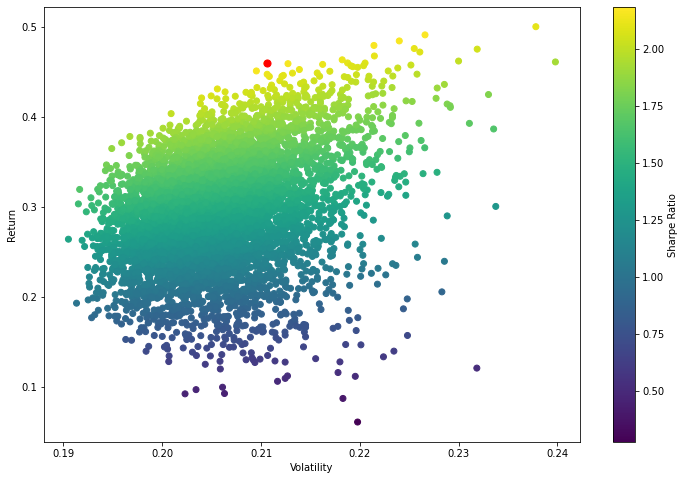

In [18]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_vol, max_returns,c='red', s=50) # red dot
plt.show()

In [19]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_returns.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

def minimize_volatility(weights):
  return get_ret_vol_sr(weights)[1]

In [20]:
frontier_x = []
frontier_y = np.linspace(0,0.6,200)
from scipy.optimize import minimize
bounds = ((0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1),(0,1))
init_guess = [0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50,0.50]

for possible_return in frontier_y:
    cons = ({'type':'eq', 'fun':check_sum},
            {'type':'eq', 'fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP', bounds=bounds, constraints=cons)
    frontier_x.append(result['fun'])

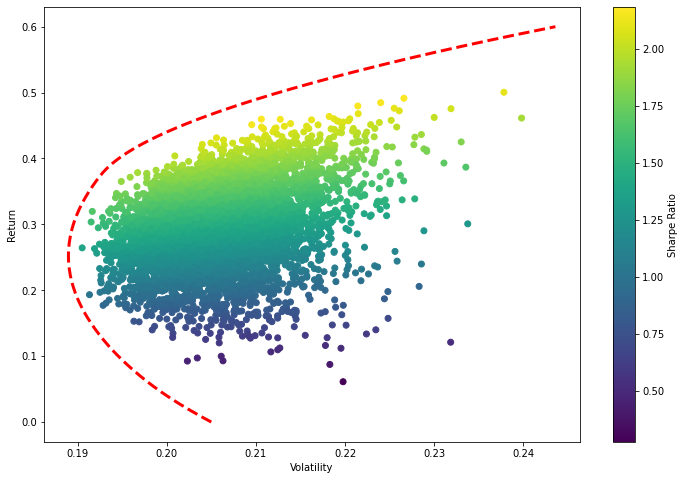

In [21]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.plot(frontier_x,frontier_y, 'r--', linewidth=3)
plt.savefig('cover.png')
plt.show()

# Different Methodology

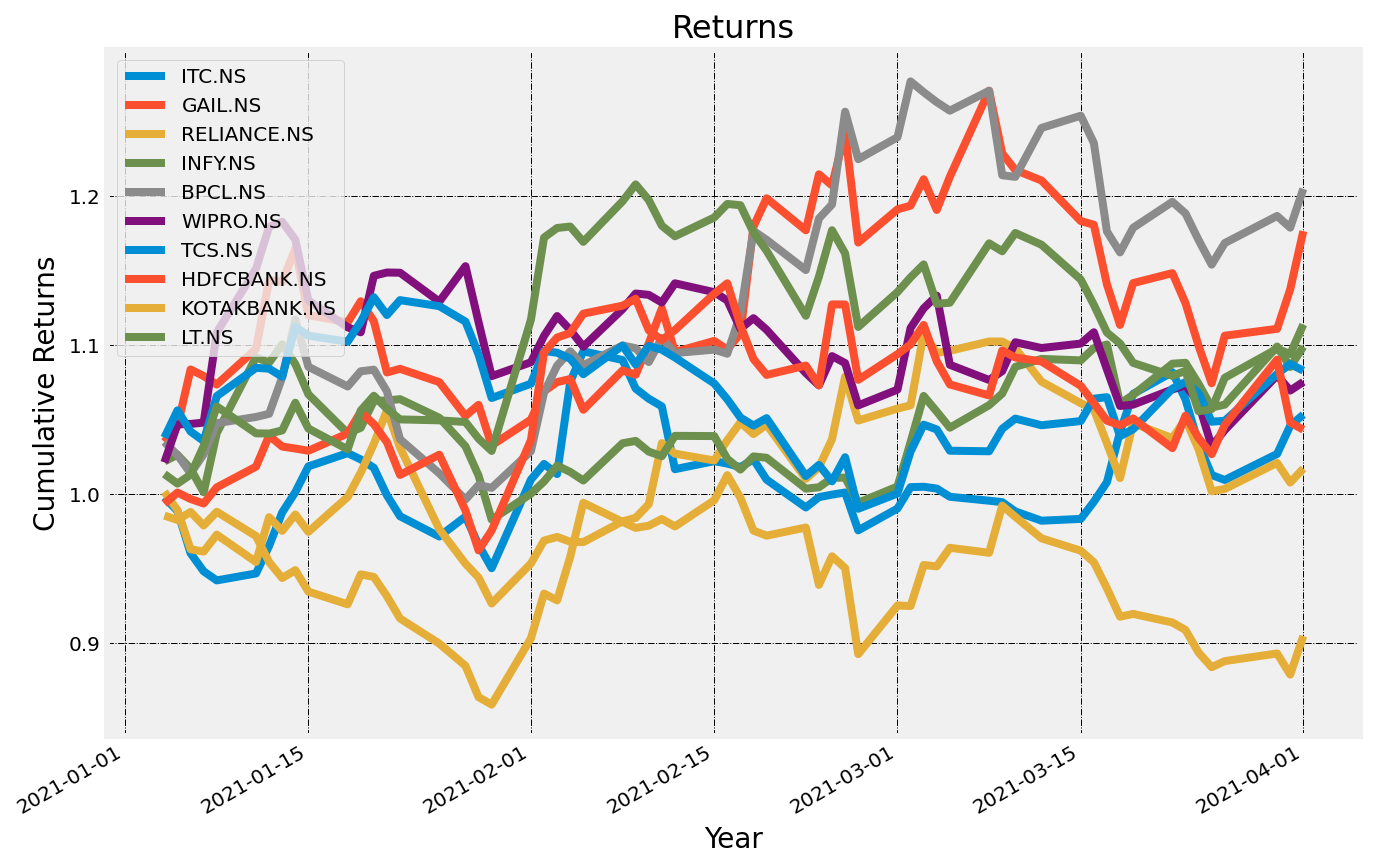

In [22]:
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.optimize as sco

plt.style.use('fivethirtyeight')
np.random.seed(777)

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
tickers = ["ITC.NS", "GAIL.NS","RELIANCE.NS", "INFY.NS", "BPCL.NS", "WIPRO.NS", "TCS.NS", "HDFCBANK.NS", "KOTAKBANK.NS", "LT.NS"]


multpl_stocks = web.get_data_yahoo(tickers,
start = "2021-01-01",
end = "2021-03-31")




# Plot all the close prices
((multpl_stocks['Adj Close'].pct_change()+1).cumprod()).plot(figsize=(10, 7))

# Show the legend
plt.legend()

# Define the label for the title of the figure
plt.title("Returns", fontsize=16)

# Define the labels for x-axis and y-axis
plt.ylabel('Cumulative Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()


stocks = multpl_stocks['Adj Close']


In [23]:
stocks.head()

Symbols,ITC.NS,GAIL.NS,RELIANCE.NS,INFY.NS,BPCL.NS,WIPRO.NS,TCS.NS,HDFCBANK.NS,KOTAKBANK.NS,LT.NS
Date,,,,,,,,,,
2021-01-01,208.898636,119.134895,1987.500000,1260.449951,363.056396,387.229431,2922.688232,1425.050049,1994.050049,1297.000000
2021-01-04,208.459045,123.326057,1990.849976,1288.250000,375.793549,395.510803,3033.677002,1416.000000,1965.550049,1314.599976
2021-01-05,206.554199,124.578583,1966.099976,1293.800049,372.609253,405.388580,3087.125244,1426.699951,1959.750000,1306.300049
2021-01-06,200.644272,129.106964,1914.250000,1282.099976,368.141724,405.488373,3045.704102,1420.550049,1970.400024,1314.000000
2021-01-07,198.104477,128.577042,1911.150024,1262.150024,372.799377,405.837585,3027.039551,1416.250000,1952.400024,1338.949951


Text(0, 0.5, 'daily returns')

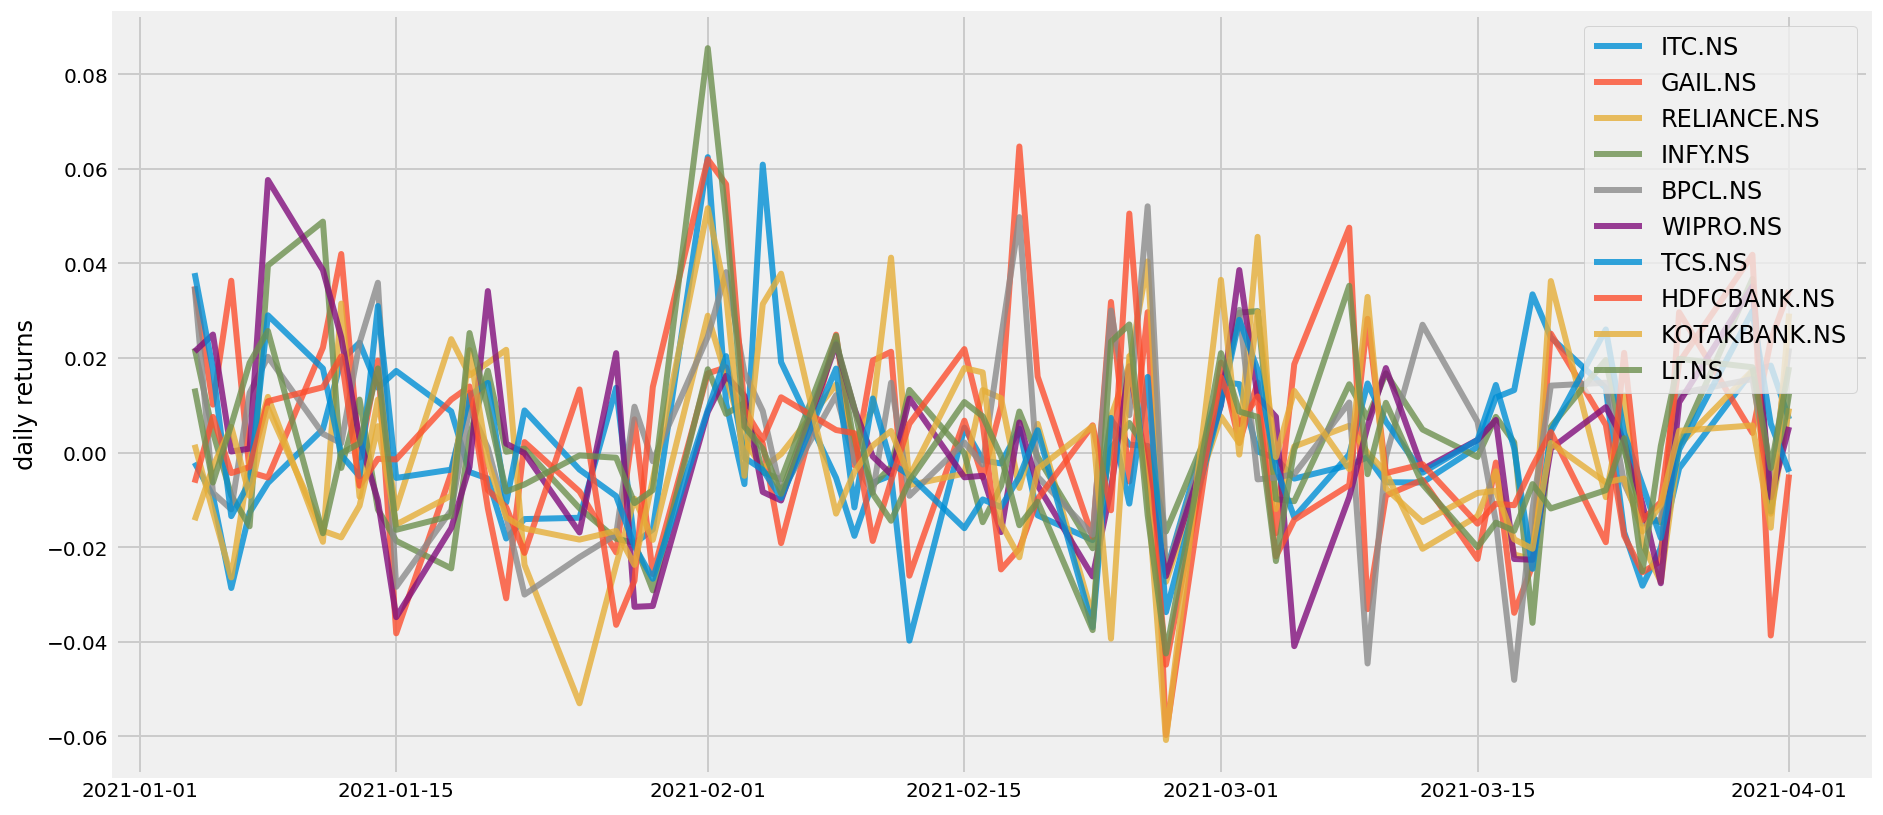

In [24]:
returns = stocks.pct_change()

plt.figure(figsize=(14, 7))
for c in returns.columns.values:
    plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
plt.legend(loc='upper right', fontsize=12)
plt.ylabel('daily returns')

In [25]:
def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    returns = np.sum(mean_returns*weights ) *252
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    return std, returns
def random_portfolios(num_portfolios, mean_returns, cov_matrix, risk_free_rate):
    results = np.zeros((10,num_portfolios))
    weights_record = []
    for i in range(num_portfolios):
        weights = np.random.random(10)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - risk_free_rate) / portfolio_std_dev
    return results, weights_record

In [26]:
returns = stocks.pct_change()
mean_returns = returns.mean()
cov_matrix = returns.cov()
num_portfolios = 25000
risk_free_rate = 0.0178

In [27]:
def display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, weights = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=stocks.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    min_vol_allocation = pd.DataFrame(weights[min_vol_idx],index=stocks.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.61
Annualised Volatility: 0.24


Symbols     ITC.NS  GAIL.NS  RELIANCE.NS  ...  HDFCBANK.NS  KOTAKBANK.NS  LT.NS
allocation    1.46    12.27         2.56  ...         0.91          0.24   6.64

[1 rows x 10 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.19


Symbols     ITC.NS  GAIL.NS  RELIANCE.NS  ...  HDFCBANK.NS  KOTAKBANK.NS  LT.NS
allocation   20.95     0.76         9.14  ...         7.13         10.03   1.84

[1 rows x 10 columns]


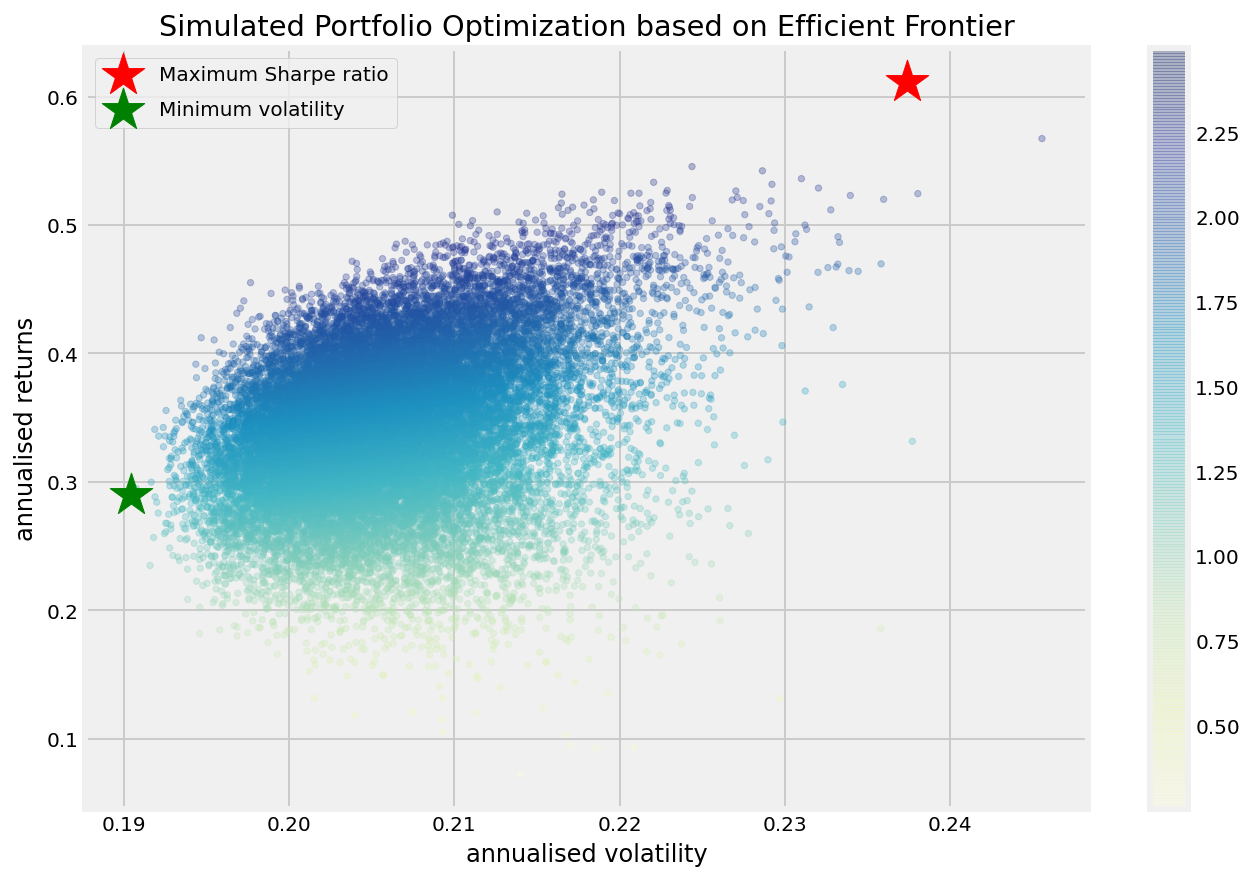

In [28]:
display_simulated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)


In [29]:
table = stocks
def neg_sharpe_ratio(weights, mean_returns, cov_matrix, risk_free_rate):
    p_var, p_ret = portfolio_annualised_performance(weights, mean_returns, cov_matrix)
    return -(p_ret - risk_free_rate) / p_var

def max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix, risk_free_rate)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))
    result = sco.minimize(neg_sharpe_ratio, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)
    return result

In [30]:
def portfolio_volatility(weights, mean_returns, cov_matrix):
    return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[0]

def min_variance(mean_returns, cov_matrix):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bound = (0.0,1.0)
    bounds = tuple(bound for asset in range(num_assets))

    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args,
                        method='SLSQP', bounds=bounds, constraints=constraints)

    return result

In [31]:
def efficient_return(mean_returns, cov_matrix, target):
    num_assets = len(mean_returns)
    args = (mean_returns, cov_matrix)

    def portfolio_return(weights):
        return portfolio_annualised_performance(weights, mean_returns, cov_matrix)[1]

    constraints = ({'type': 'eq', 'fun': lambda x: portfolio_return(x) - target},
                   {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    bounds = tuple((0,1) for asset in range(num_assets))
    result = sco.minimize(portfolio_volatility, num_assets*[1./num_assets,], args=args, method='SLSQP', bounds=bounds, constraints=constraints)
    return result


def efficient_frontier(mean_returns, cov_matrix, returns_range):
    efficients = []
    for ret in returns_range:
        efficients.append(efficient_return(mean_returns, cov_matrix, ret))
    return efficients

In [32]:
def display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate):
    results, _ = random_portfolios(num_portfolios,mean_returns, cov_matrix, risk_free_rate)
    
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    
    plt.figure(figsize=(10, 7))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='YlGnBu', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.8, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    plt.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    plt.title('Calculated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualised volatility')
    plt.ylabel('annualised returns')
    plt.legend(labelspacing=0.8)

--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.68
Annualised Volatility: 0.26


Symbols     ITC.NS  GAIL.NS  RELIANCE.NS  ...  HDFCBANK.NS  KOTAKBANK.NS  LT.NS
allocation    3.37    10.47          0.0  ...          0.0           0.0   7.19

[1 rows x 10 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.19


Symbols     ITC.NS  GAIL.NS  RELIANCE.NS  ...  HDFCBANK.NS  KOTAKBANK.NS  LT.NS
allocation   22.92     1.57         5.02  ...         6.77         12.43    0.0

[1 rows x 10 columns]


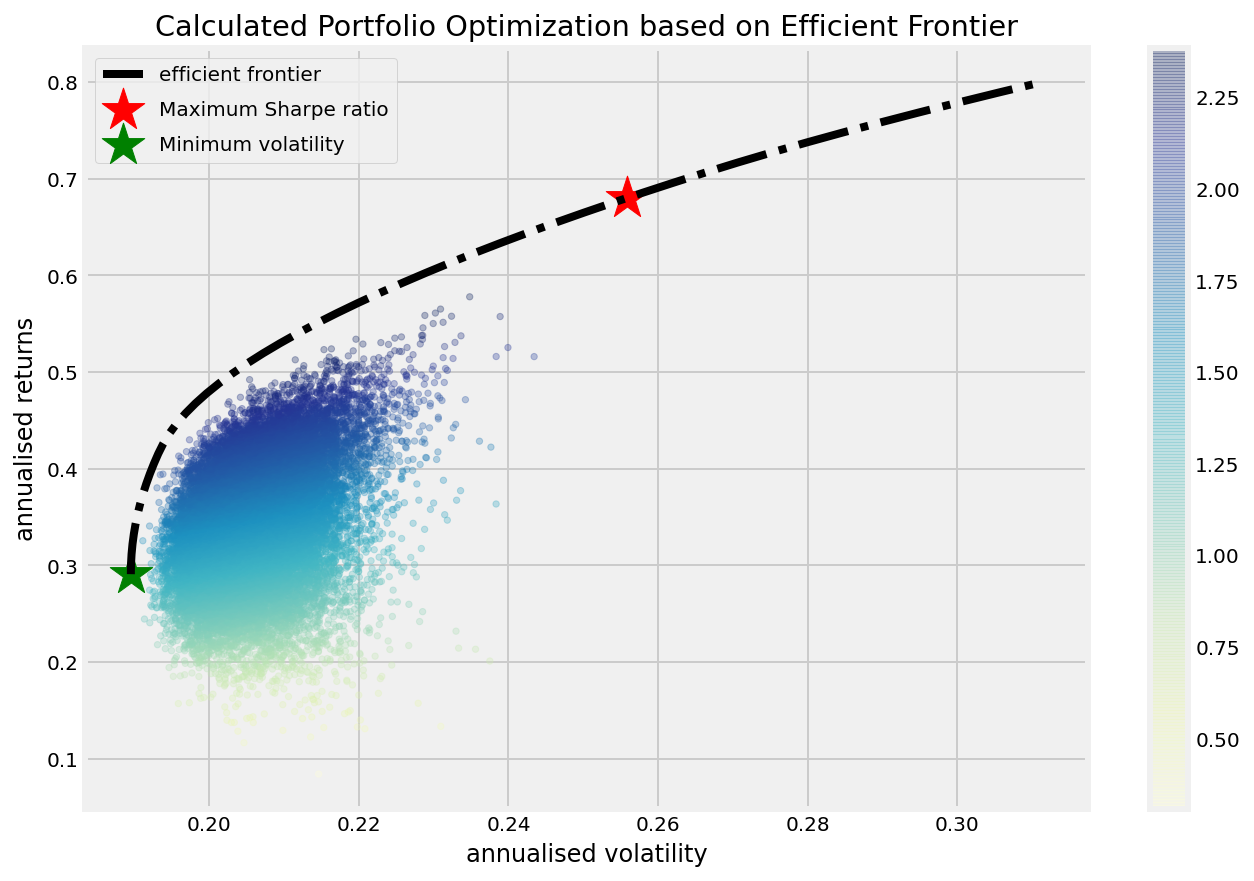

In [33]:
display_calculated_ef_with_random(mean_returns, cov_matrix, num_portfolios, risk_free_rate)


--------------------------------------------------------------------------------
Maximum Sharpe Ratio Portfolio Allocation

Annualised Return: 0.68
Annualised Volatility: 0.26


Symbols     ITC.NS  GAIL.NS  RELIANCE.NS  ...  HDFCBANK.NS  KOTAKBANK.NS  LT.NS
allocation    3.37    10.47          0.0  ...          0.0           0.0   7.19

[1 rows x 10 columns]
--------------------------------------------------------------------------------
Minimum Volatility Portfolio Allocation

Annualised Return: 0.29
Annualised Volatility: 0.19


Symbols     ITC.NS  GAIL.NS  RELIANCE.NS  ...  HDFCBANK.NS  KOTAKBANK.NS  LT.NS
allocation   22.92     1.57         5.02  ...         6.77         12.43    0.0

[1 rows x 10 columns]
--------------------------------------------------------------------------------
Individual Stock Returns and Volatility

ITC.NS : annuaised return 0.26 , annualised volatility: 0.29
GAIL.NS : annuaised return 0.74 , annualised volatility: 0.38
RELIANCE.NS : annuaised return 0.12

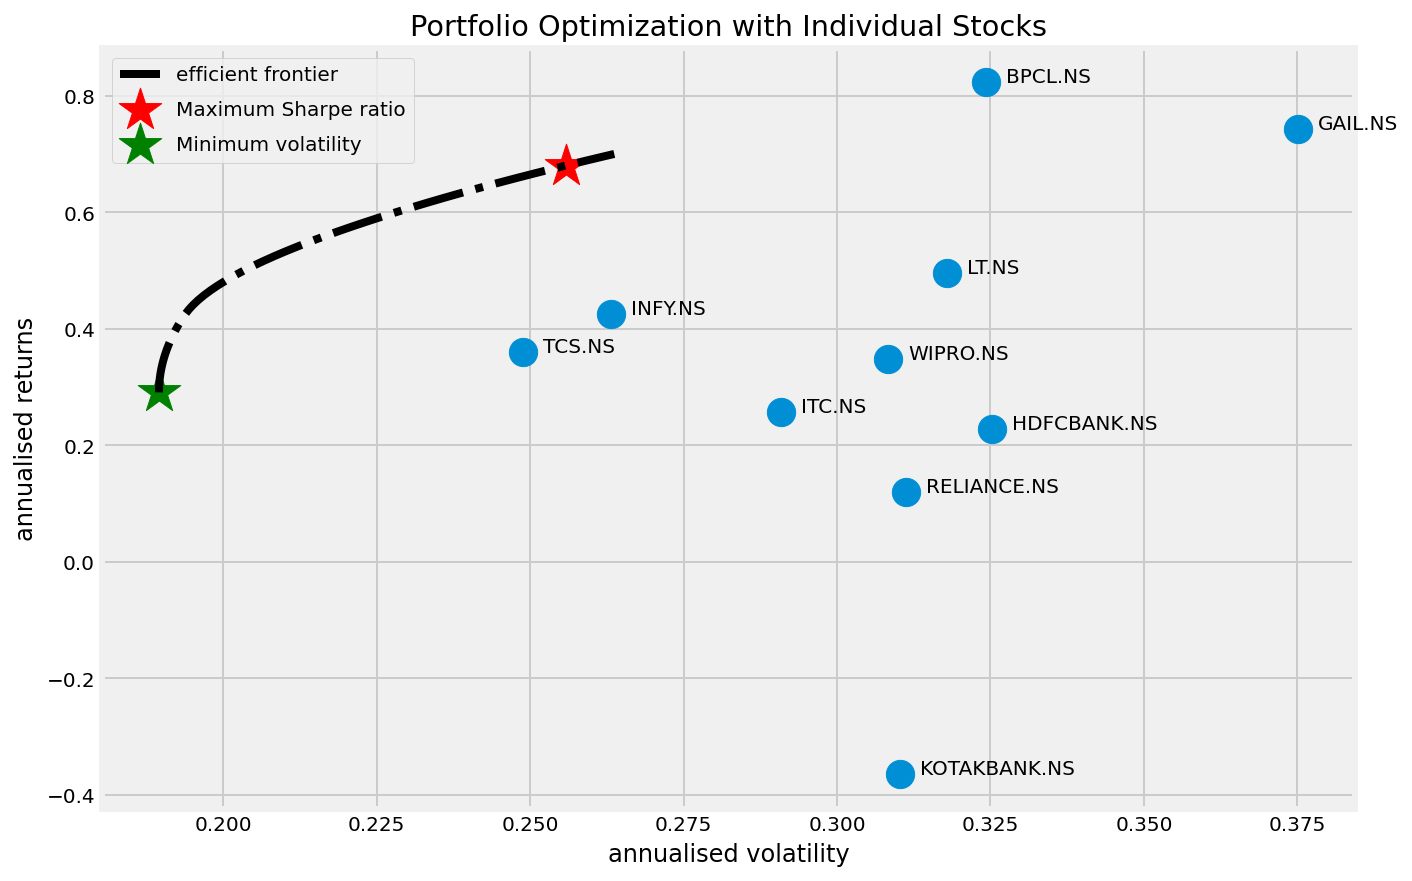

In [34]:
def display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate):
    max_sharpe = max_sharpe_ratio(mean_returns, cov_matrix, risk_free_rate)
    sdp, rp = portfolio_annualised_performance(max_sharpe['x'], mean_returns, cov_matrix)
    max_sharpe_allocation = pd.DataFrame(max_sharpe.x,index=table.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i*100,2)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    max_sharpe_allocation

    min_vol = min_variance(mean_returns, cov_matrix)
    sdp_min, rp_min = portfolio_annualised_performance(min_vol['x'], mean_returns, cov_matrix)
    min_vol_allocation = pd.DataFrame(min_vol.x,index=table.columns,columns=['allocation'])
    min_vol_allocation.allocation = [round(i*100,2)for i in min_vol_allocation.allocation]
    min_vol_allocation = min_vol_allocation.T
    
    an_vol = np.std(returns) * np.sqrt(252)
    an_rt = mean_returns * 252
    
    print ("-"*80)
    print ("Maximum Sharpe Ratio Portfolio Allocation\n")
    print ("Annualised Return:", round(rp,2))
    print ("Annualised Volatility:", round(sdp,2))
    print ("\n")
    print (max_sharpe_allocation)
    print ("-"*80)
    print ("Minimum Volatility Portfolio Allocation\n")
    print ("Annualised Return:", round(rp_min,2))
    print ("Annualised Volatility:", round(sdp_min,2))
    print ("\n")
    print (min_vol_allocation)
    print ("-"*80)
    print ("Individual Stock Returns and Volatility\n")
    for i, txt in enumerate(table.columns):
      print (txt,":","annuaised return",round(an_rt[i],2),", annualised volatility:",round(an_vol[i],2))
    print ("-"*80)
    
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.scatter(an_vol,an_rt,marker='o',s=200)

    for i, txt in enumerate(table.columns):
        ax.annotate(txt, (an_vol[i],an_rt[i]), xytext=(10,0), textcoords='offset points')
    ax.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    ax.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')

    target = np.linspace(rp_min, 0.7, 50)
    efficient_portfolios = efficient_frontier(mean_returns, cov_matrix, target)
    ax.plot([p['fun'] for p in efficient_portfolios], target, linestyle='-.', color='black', label='efficient frontier')
    ax.set_title('Portfolio Optimization with Individual Stocks')
    ax.set_xlabel('annualised volatility')
    ax.set_ylabel('annualised returns')
    ax.legend(labelspacing=0.8)
display_ef_with_selected(mean_returns, cov_matrix, risk_free_rate)

As you can see from the above plot, the stock with the least risk is TCS at around 0.38. But with portfolio optimisation, we can achieve even lower risk at 0.36, and still with a higher return than Google. And if we are willing to take slightly more risk at around the similar level of risk of TCS, we can achieve a much higher return of 0.30 with portfolio optimization.

reference: https://nbviewer.jupyter.org/github/tthustla/efficient_frontier/blob/master/Efficient%20_Frontier_implementation.ipynb


In [35]:
from PortfolioOptimizer import *


In [36]:
port = Portfolio(table)


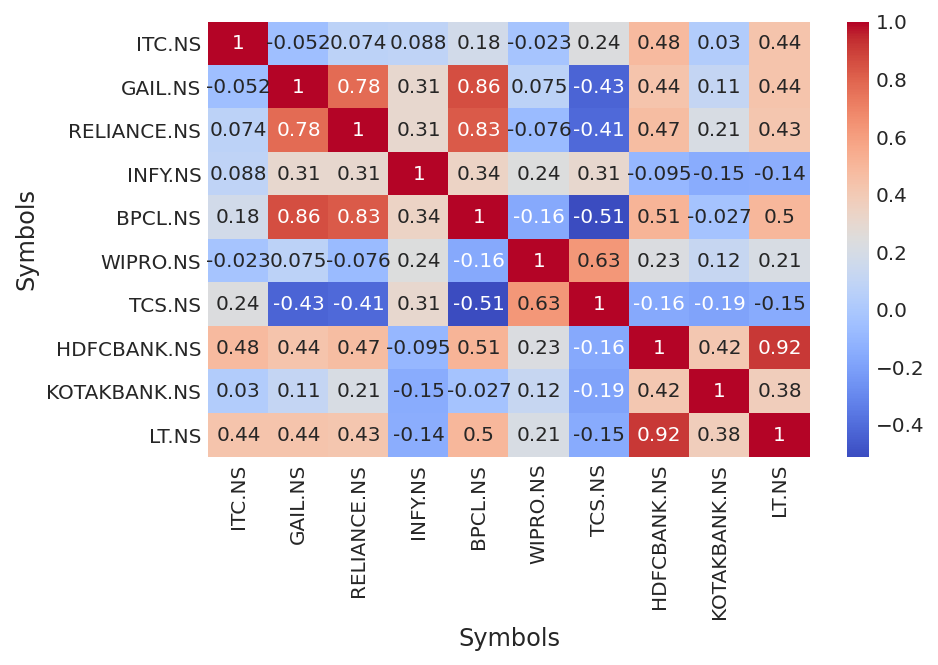

In [37]:
port.price_corr_map()


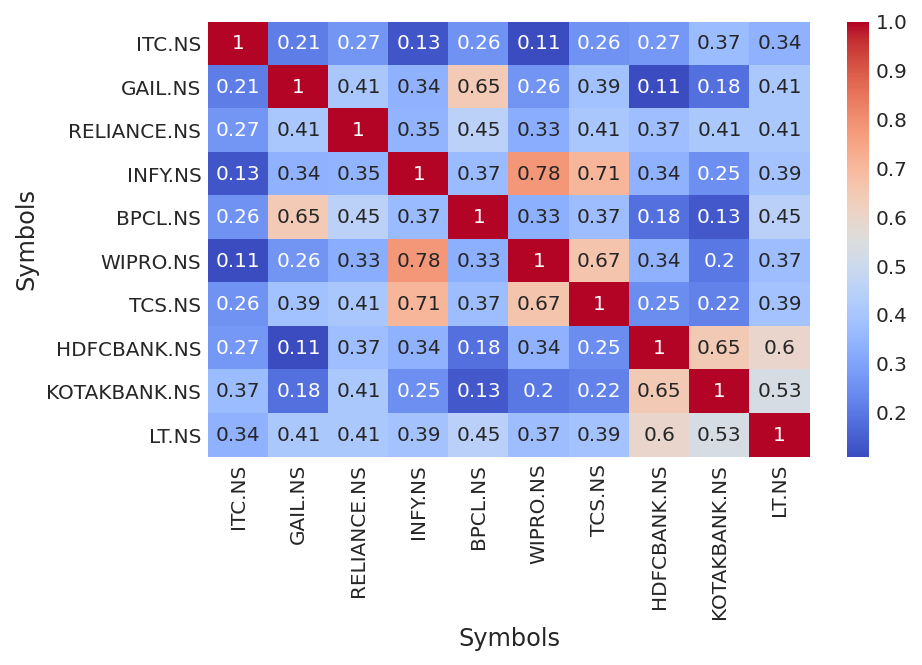

In [38]:
port.return_corr_map()


In [39]:
port.Summary()


                      Period                      
From 2021-01-01  to 2021-04-01, 90 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
ITC.NS                                  10.00%
GAIL.NS                                 10.00%
RELIANCE.NS                             10.00%
INFY.NS                                 10.00%
BPCL.NS                                 10.00%
WIPRO.NS                                10.00%
TCS.NS                                  10.00%
HDFCBANK.NS                             10.00%
KOTAKBANK.NS                            10.00%
LT.NS                                   10.00%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.295
Average Standard 

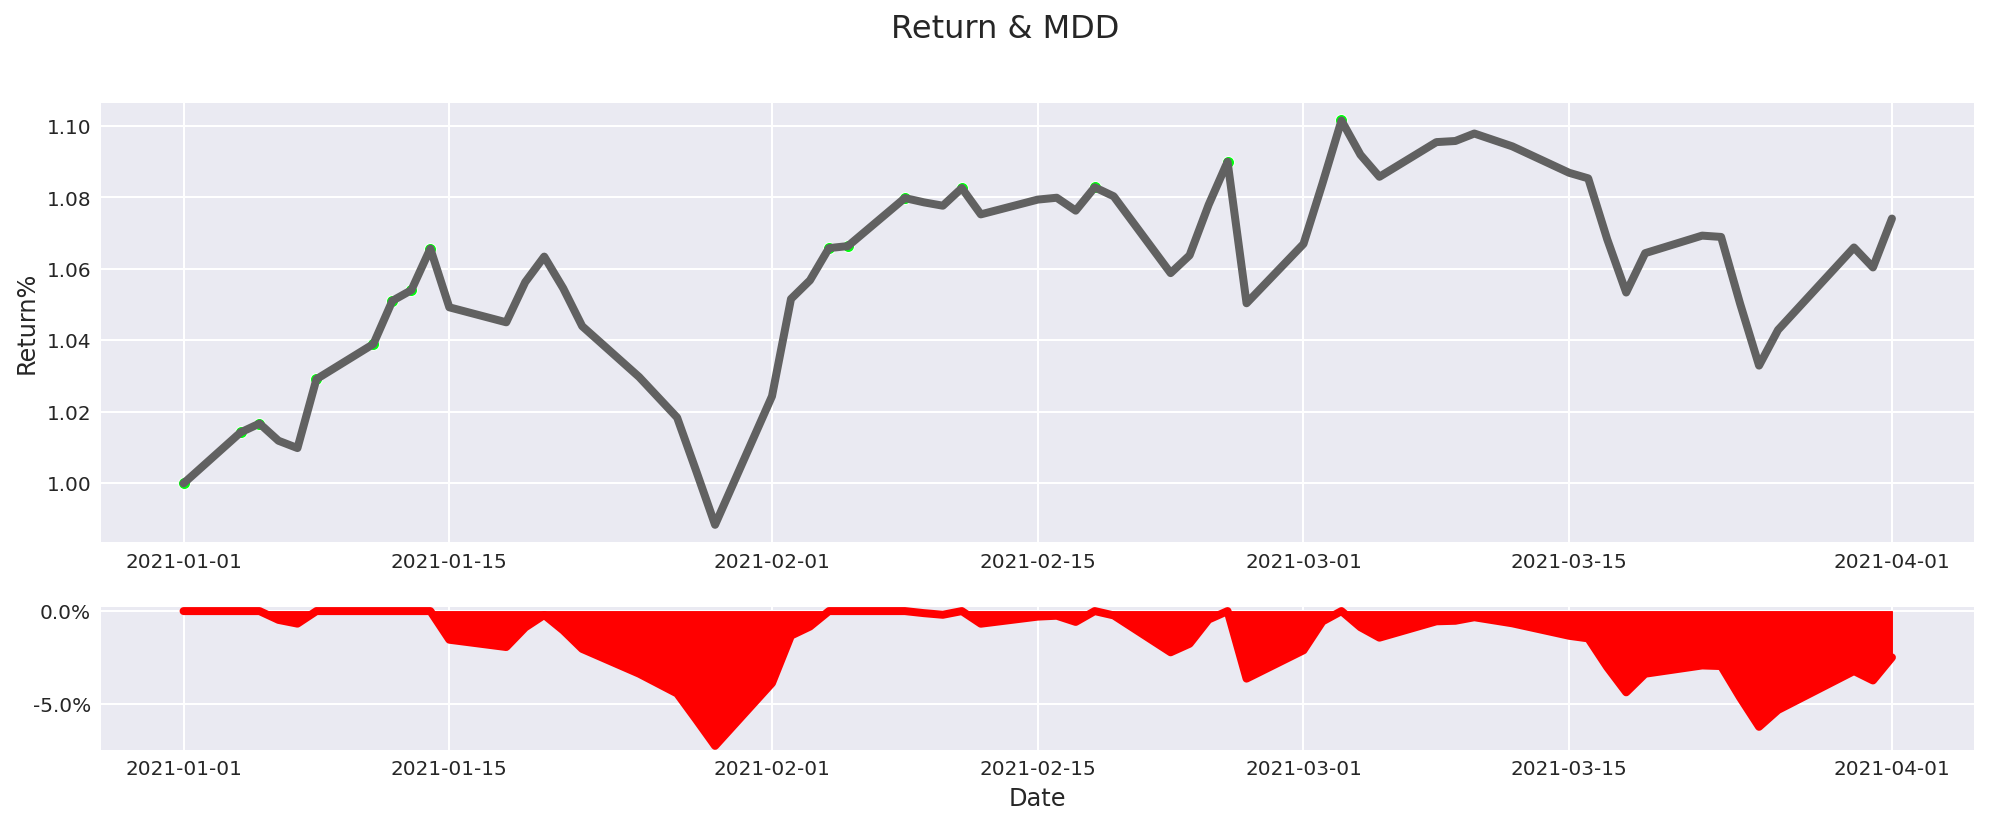

In [40]:
port.Return_Plot()


Begin :  2021-01-01 00:00:00
End :  2021-04-01 00:00:00
Rf :  0.05


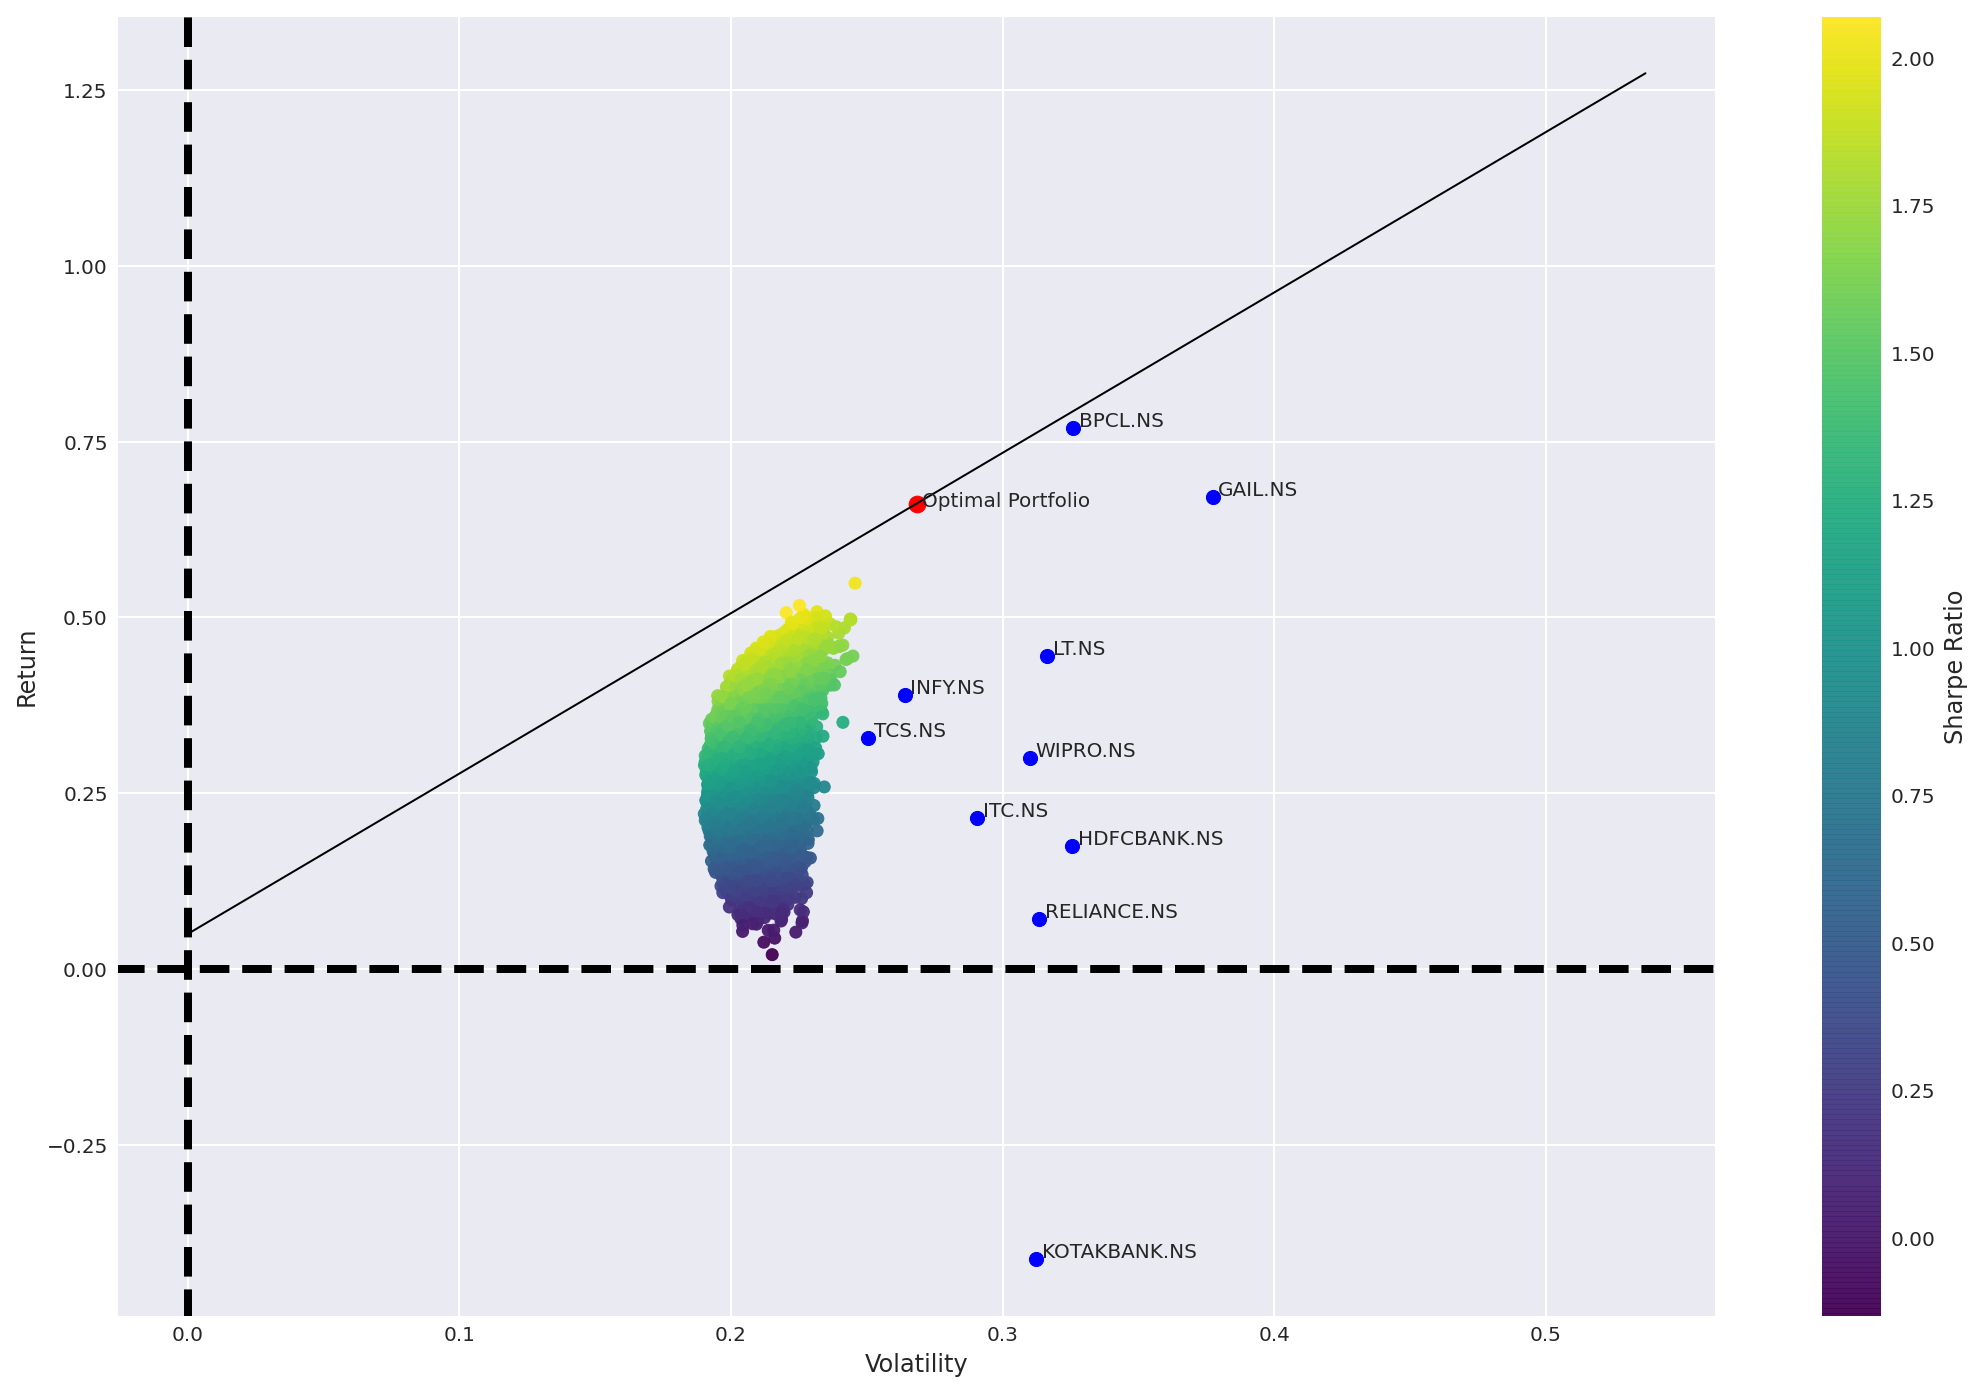

In [41]:

port.set_optimize()
port.optimize_set()
port.Plot_Effcient_Frontier()

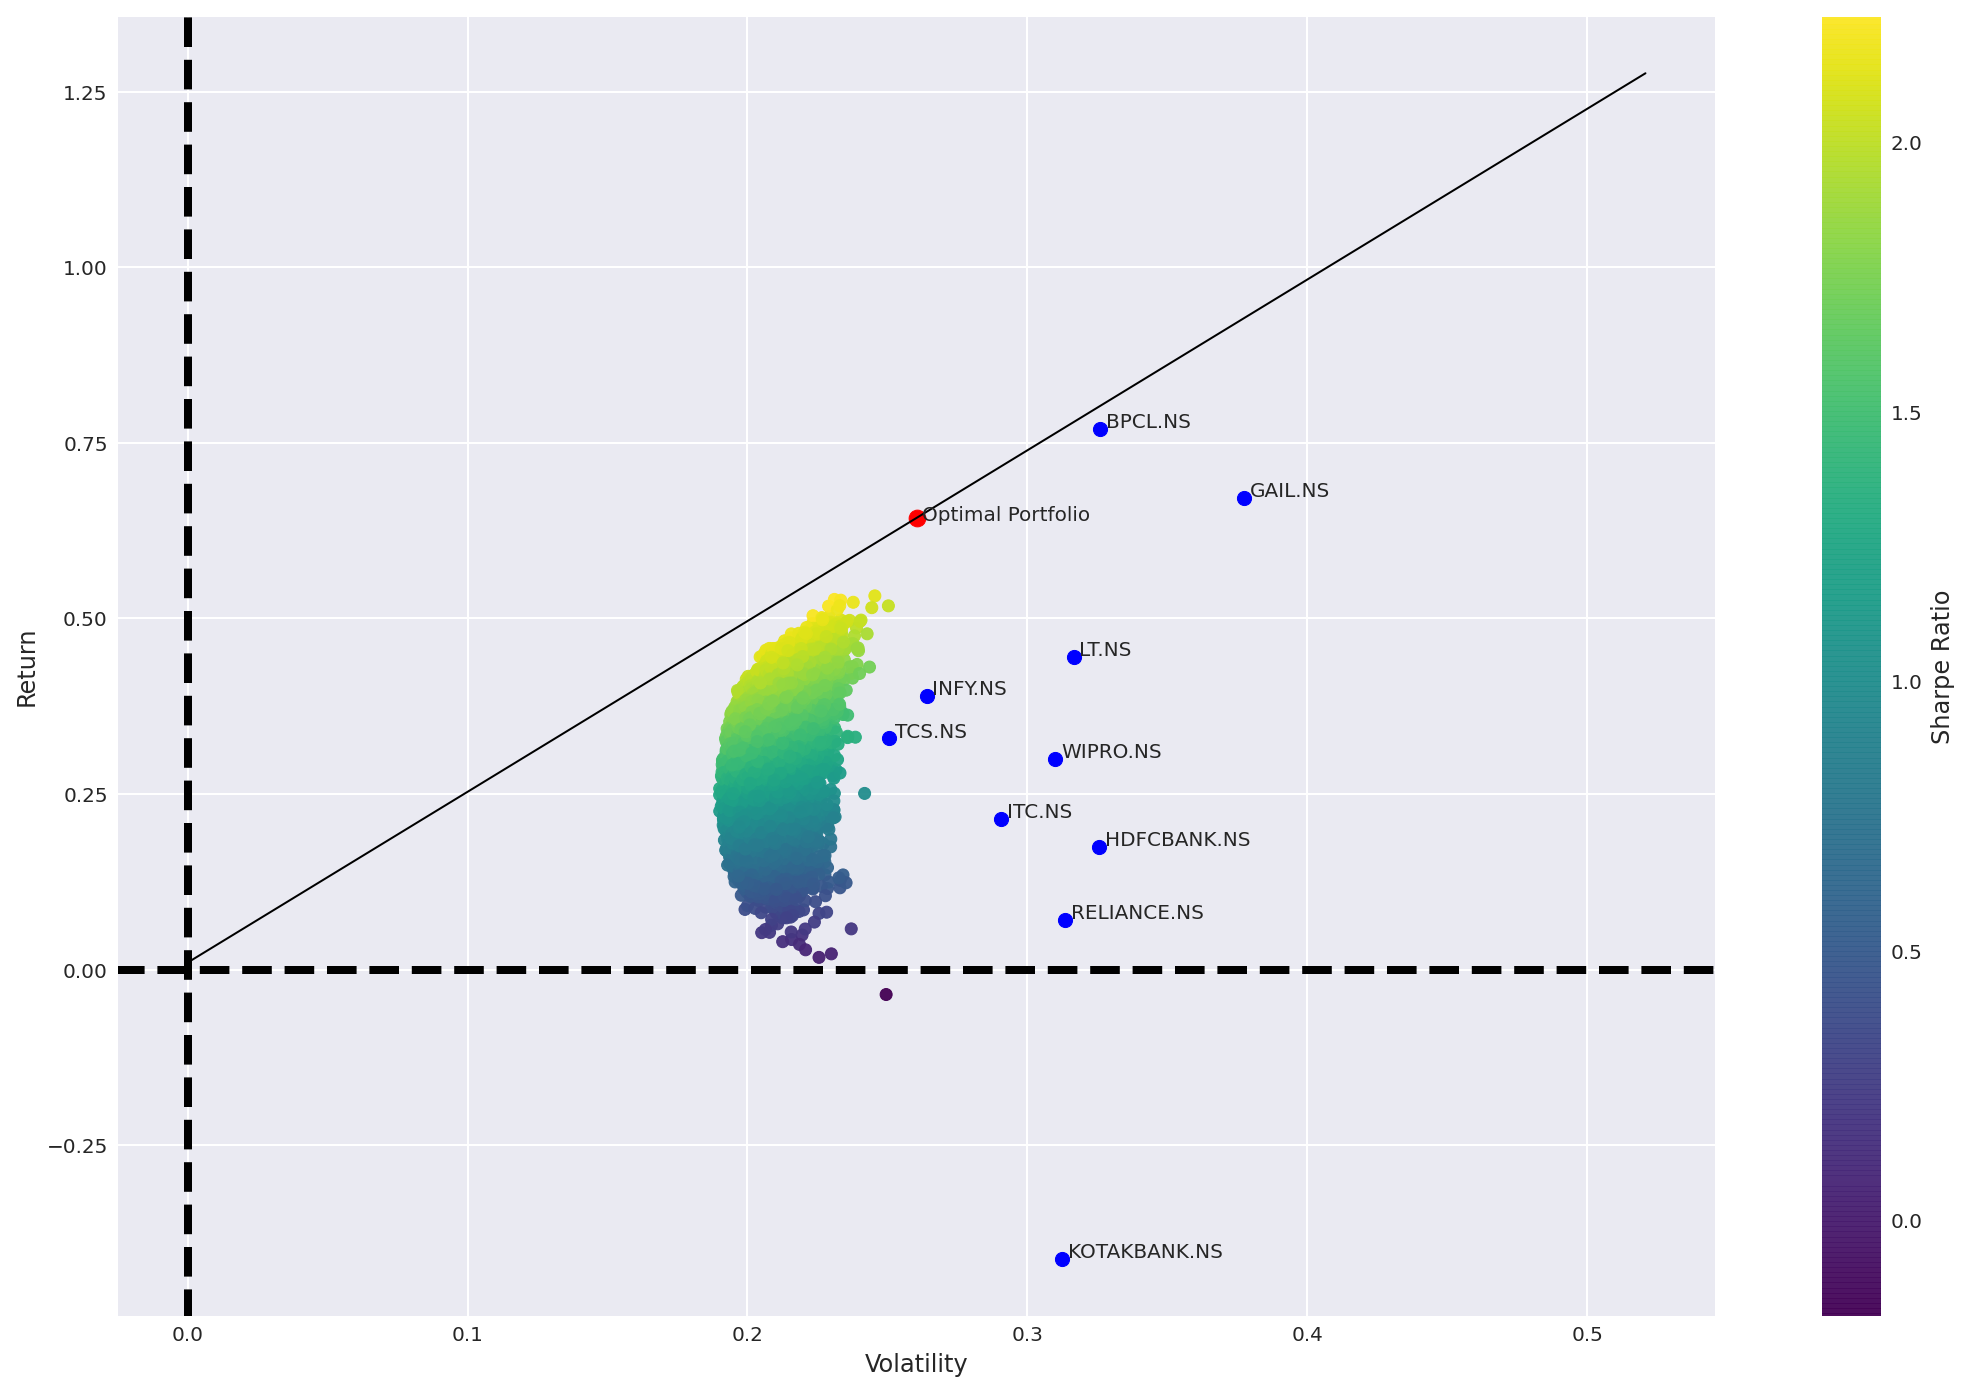

In [42]:
# CML
port.set_optimize(rf=0.01)
port.Plot_Effcient_Frontier()

In [43]:
port.Get_Best_Portfolio()


(2.43125949103433,
 [0.011033830403874085,
  0.07752102975052605,
  8.383254485565261e-16,
  0.2392180975541218,
  0.6047691709285038,
  0.0,
  0.0,
  0.0,
  1.0836532951356836e-15,
  0.06745787136297333])

In [44]:
port.set_weights(port.Get_Best_Portfolio()[1])


In [45]:
port.Summary()


                      Period                      
From 2021-01-01  to 2021-04-01, 90 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
ITC.NS                                   1.10%
GAIL.NS                                  7.75%
RELIANCE.NS                              0.00%
INFY.NS                                 23.92%
BPCL.NS                                 60.48%
WIPRO.NS                                 0.00%
TCS.NS                                   0.00%
HDFCBANK.NS                              0.00%
KOTAKBANK.NS                             0.00%
LT.NS                                    6.75%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.643
Average Standard 

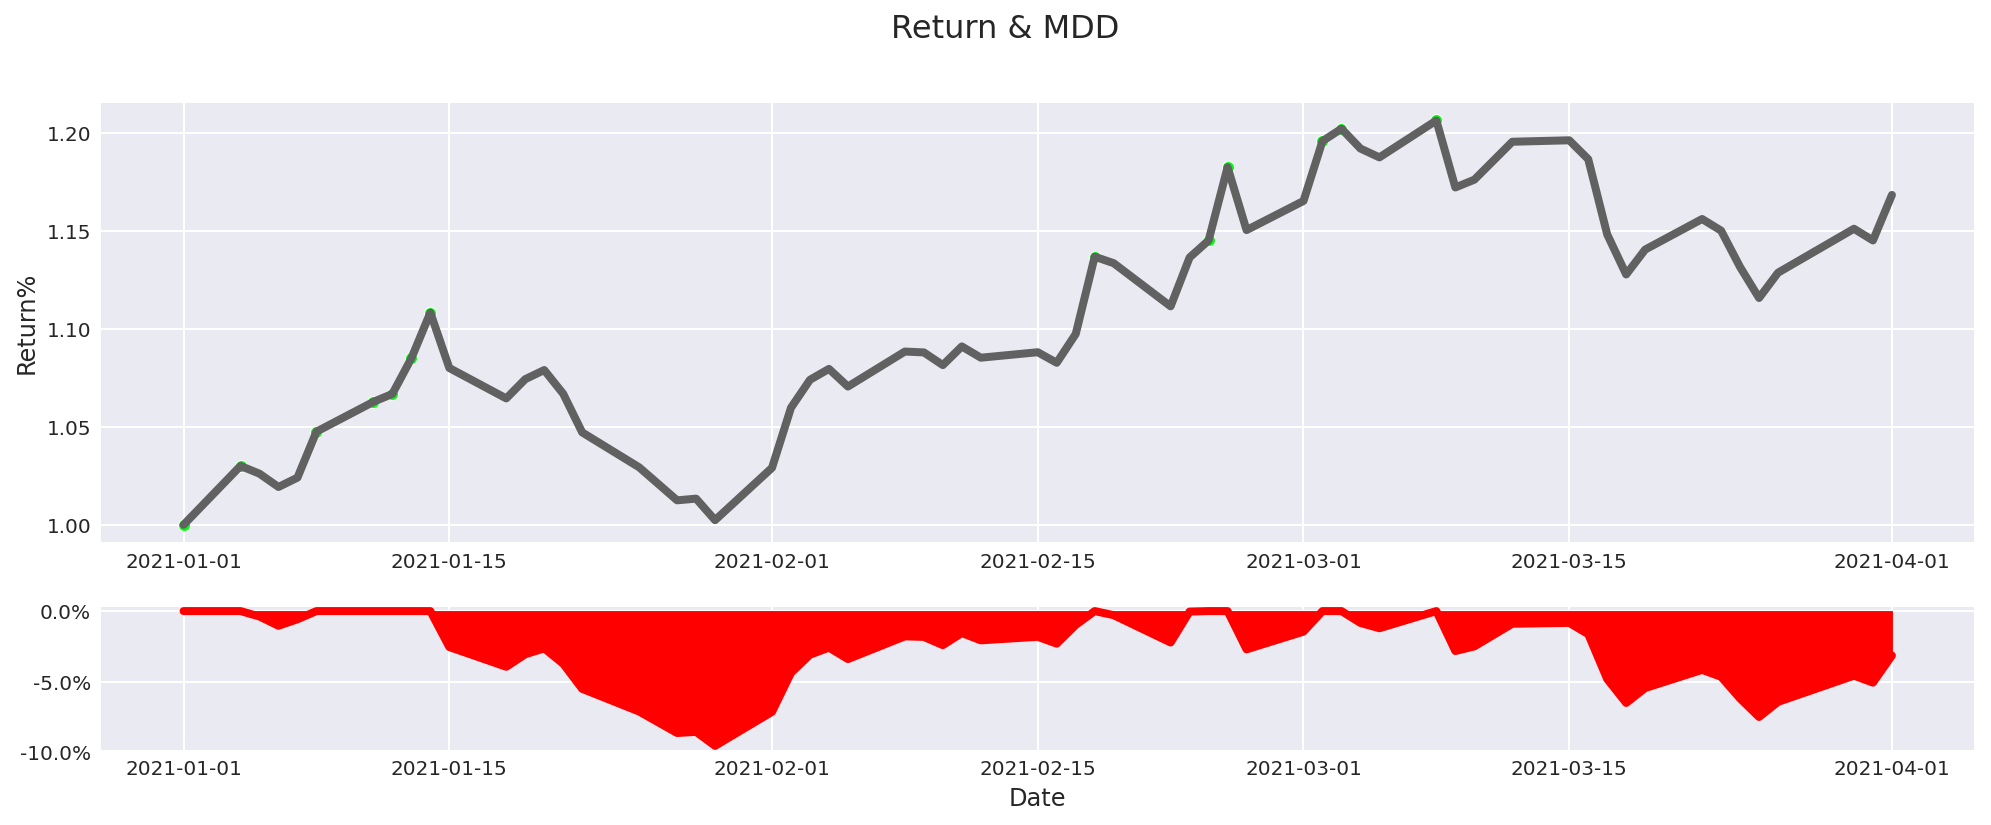

In [46]:
port.Return_Plot()


In [47]:
port.set_weights(port.Get_Best_Portfolio(method='mdd')[1])
port.Summary()

                      Period                      
From 2021-01-01  to 2021-04-01, 90 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
ITC.NS                                   7.34%
GAIL.NS                                  0.00%
RELIANCE.NS                              1.40%
INFY.NS                                  9.12%
BPCL.NS                                 18.72%
WIPRO.NS                                 0.00%
TCS.NS                                  24.19%
HDFCBANK.NS                              0.00%
KOTAKBANK.NS                             0.00%
LT.NS                                   39.23%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.451
Average Standard 

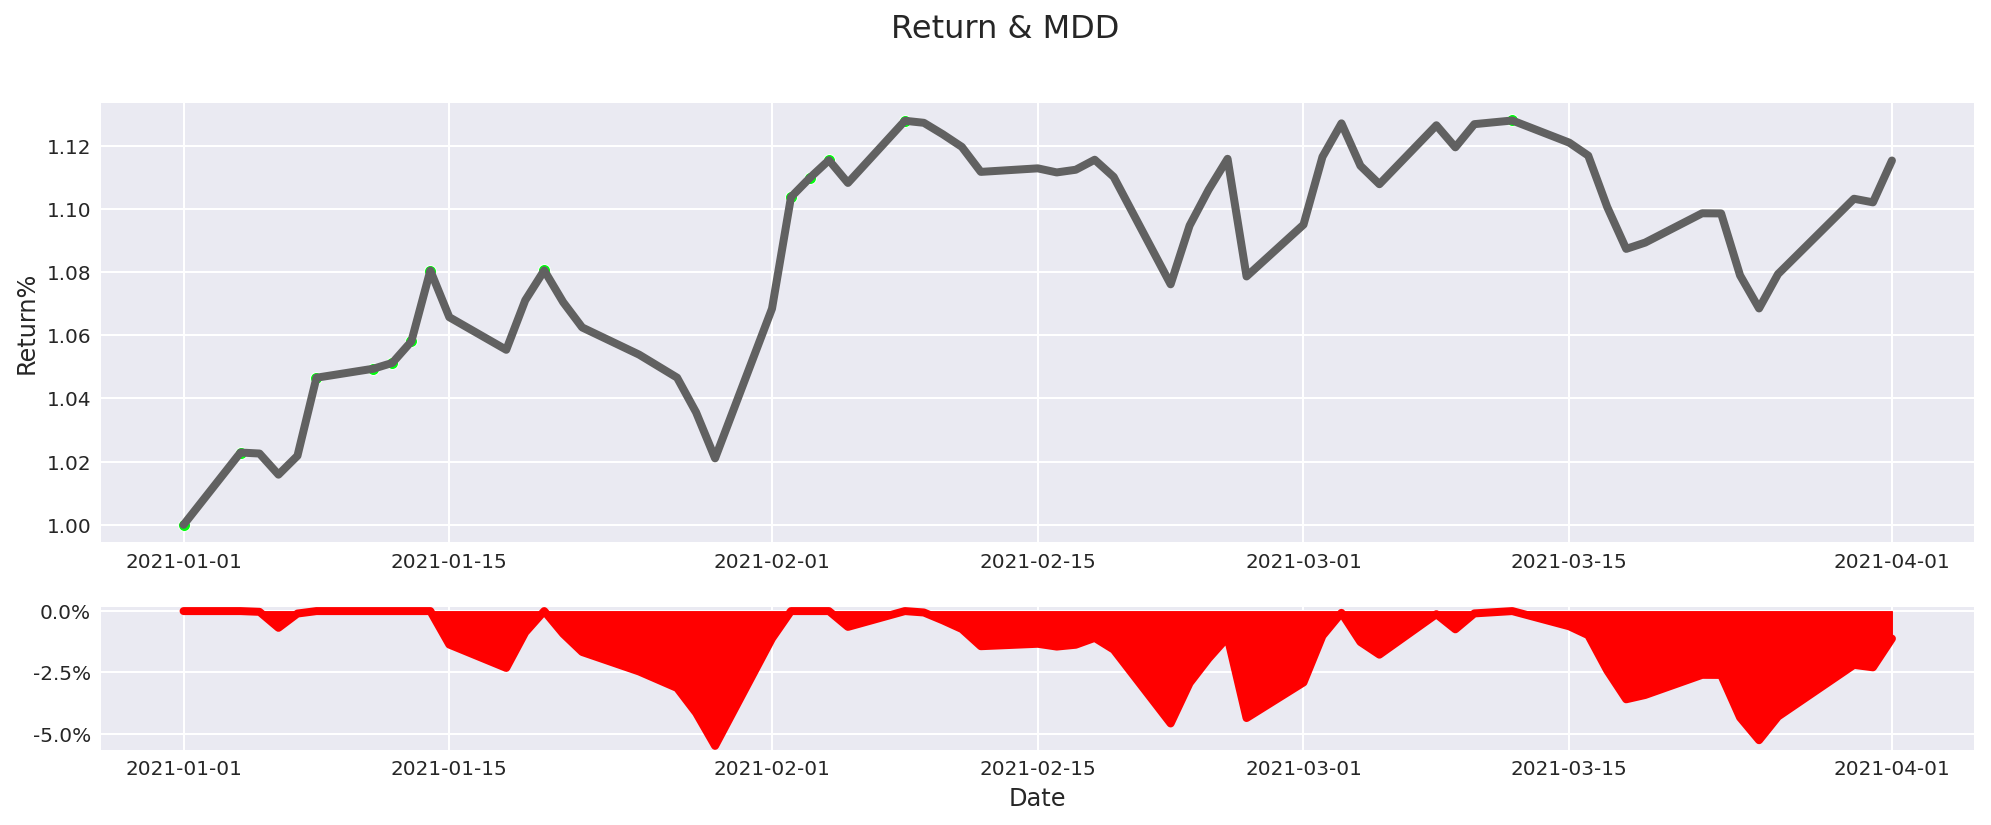

In [48]:
port.Return_Plot()


In [49]:
# Volatility
port.set_weights(port.Get_Best_Portfolio(method='std')[1])
port.Summary()

                      Period                      
From 2021-01-01  to 2021-04-01, 90 days.
------------------------------------------------------------
              Weights of Portfolio:               
------------------------------------------------------------
ITC.NS                                  23.44%
GAIL.NS                                  0.99%
RELIANCE.NS                              4.65%
INFY.NS                                 19.80%
BPCL.NS                                 10.60%
WIPRO.NS                                 0.00%
TCS.NS                                  21.26%
HDFCBANK.NS                              7.18%
KOTAKBANK.NS                            12.08%
LT.NS                                    0.00%
------------------------------------------------------------


               Technical Indicator:               
------------------------------------------------------------
Average Return :                                                   0.252
Average Standard 

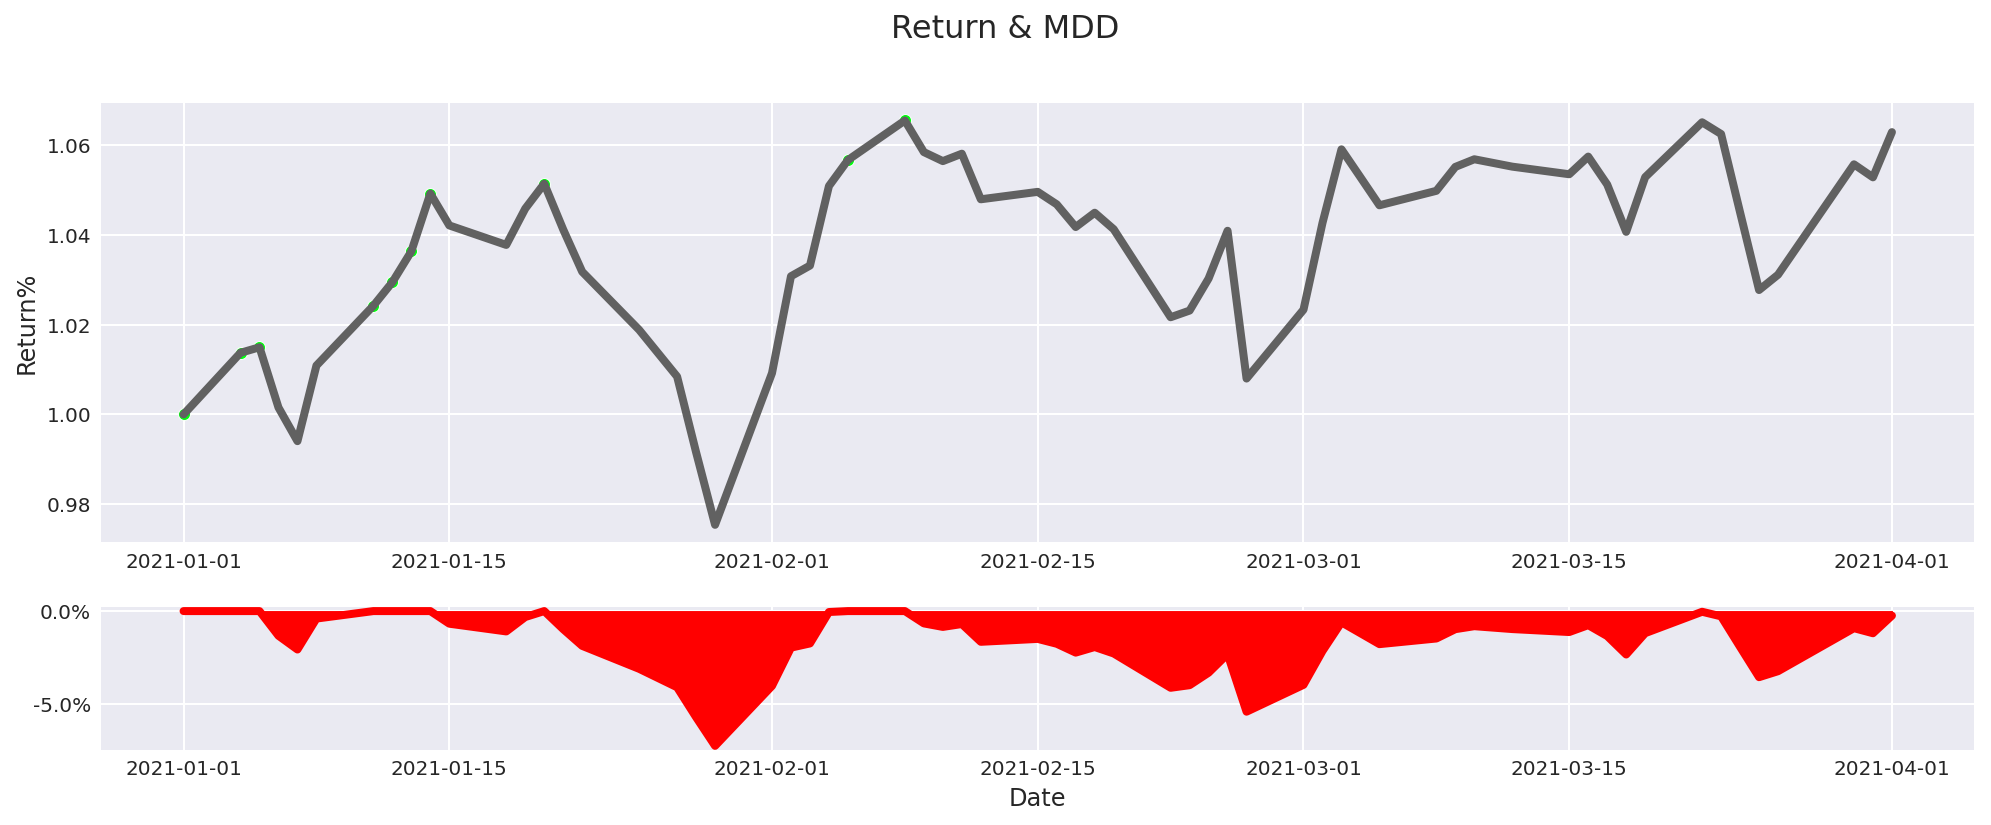

In [50]:
port.Return_Plot()


In [51]:
table.head()

Symbols,ITC.NS,GAIL.NS,RELIANCE.NS,INFY.NS,BPCL.NS,WIPRO.NS,TCS.NS,HDFCBANK.NS,KOTAKBANK.NS,LT.NS
Date,,,,,,,,,,
2021-01-01,208.898636,119.134895,1987.500000,1260.449951,363.056396,387.229431,2922.688232,1425.050049,1994.050049,1297.000000
2021-01-04,208.459045,123.326057,1990.849976,1288.250000,375.793549,395.510803,3033.677002,1416.000000,1965.550049,1314.599976
2021-01-05,206.554199,124.578583,1966.099976,1293.800049,372.609253,405.388580,3087.125244,1426.699951,1959.750000,1306.300049
2021-01-06,200.644272,129.106964,1914.250000,1282.099976,368.141724,405.488373,3045.704102,1420.550049,1970.400024,1314.000000
2021-01-07,198.104477,128.577042,1911.150024,1262.150024,372.799377,405.837585,3027.039551,1416.250000,1952.400024,1338.949951
